# **Data Visualization using Python**

# **Exercise - Solutions**

## **Instructor**: Santosh Chapaneri

## April 2020

# Exploratory Data Anaylsis: Political Affairs

Dataset from 1978, contains information about politicians having affairs

https://www.statsmodels.org/stable/datasets/generated/fair.html

In [0]:
# Required libraries

import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Upload affairs.csv file

uploaded = files.upload()

Saving affairs.csv to affairs.csv


In [0]:
import io

# Read the dataset using pandas read_csv and io BytesIO
affairs = pd.read_csv(io.BytesIO(uploaded['affairs.csv']))

In [4]:
# Look at the first 10 rows of the data
affairs.head(10)

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0
5,female,32.0,1.50,no,2,17,5,5,0
6,female,22.0,0.75,no,2,12,1,3,0
7,male,57.0,15.00,yes,2,14,4,4,0
8,female,32.0,15.00,yes,4,16,1,2,0
9,male,22.0,1.50,no,4,14,4,5,0


(array([286., 315.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

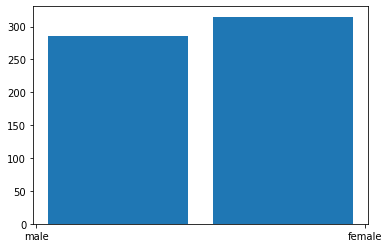

In [5]:
# Plot the histogram of 'sex' attribute using Matplotlib
# Use bins = 2 and rwidth = 0.85

plt.hist(affairs.sex, bins = 2, rwidth = 0.85)

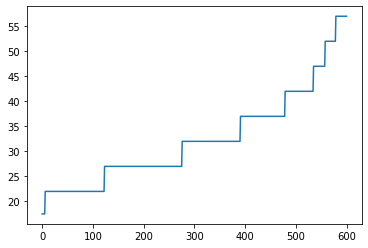

In [6]:
# Sort the age attribute in ascending order and plot it using Matplotlib.
# Hint: Use np.sort for sorting

age_sorted = np.sort(affairs.age)
plt.plot(age_sorted)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


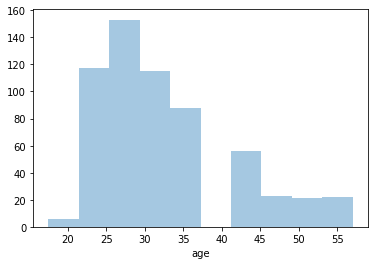

In [7]:
import seaborn as sns

# Visualize the distribution of the age of politicians by plotting 
# only histogram using Seaborn
# Hint: Use distplot of sns, bins = 10, kde = False

sns.distplot(affairs['age'], bins = 10, kde = False)

In [8]:
# Find the number of unique affairs using value_counts method

affairs.nbaffairs.value_counts()

0     451
7      42
12     38
1      34
3      19
2      17
Name: nbaffairs, dtype: int64

In [9]:
print('{} people out of {} did not have an affair'.format(affairs.nbaffairs.value_counts()[0], affairs.shape[0]))

451 people out of 601 did not have an affair


(array([140.,   0., 105.,   0.,  82.,   0.,  70.,   0.,   0., 204.]),
 array([ 0.125 ,  1.6125,  3.1   ,  4.5875,  6.075 ,  7.5625,  9.05  ,
        10.5375, 12.025 , 13.5125, 15.    ]),
 <a list of 10 Patch objects>)

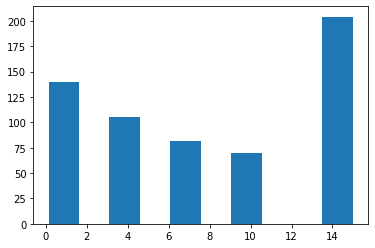

In [10]:
# Visualizse the histogram of years of marriage using Matplotlib
# Use bins = 10

plt.hist(affairs.ym, bins = 10)

In [11]:
# Find the average age of politicians

affairs.age.mean()

32.48752079866888

The average age of our people is around 32, but most people are married for more than 14 years!

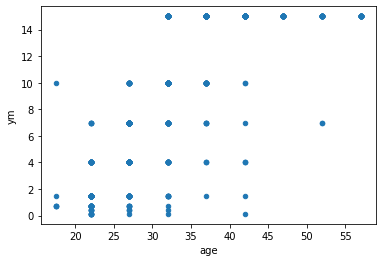

In [17]:
# Plot the scatter plot of age v/s years married

affairs.plot(kind='scatter', x='age', y='ym')

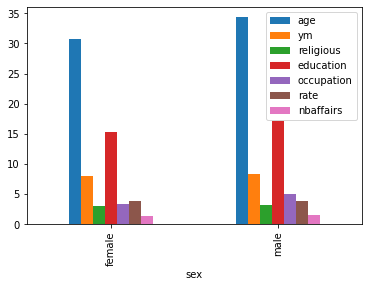

In [21]:
# Calculate the mean values for each sex attribute
# Group the data by sex and plot the histogram of mean values

affairs.groupby('sex').mean().plot(kind='bar')

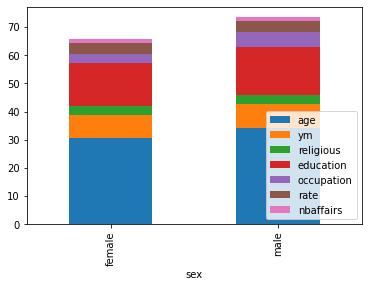

In [23]:
# Repeat the above question but now with Stacked Bar Plot

affairs.groupby('sex').mean().plot(kind='bar', stacked=True)

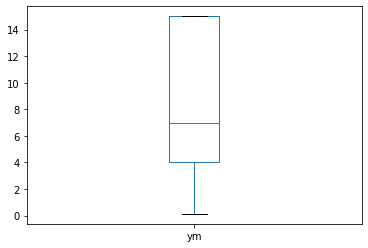

In [26]:
# Visualize the box plot of 'ym' attribute

affairs.ym.plot(kind='box')

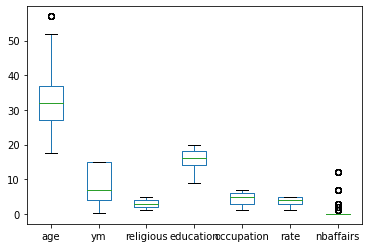

In [27]:
# Plot one figure showing boxplots of all numerical attributes

affairs.plot(kind='box')

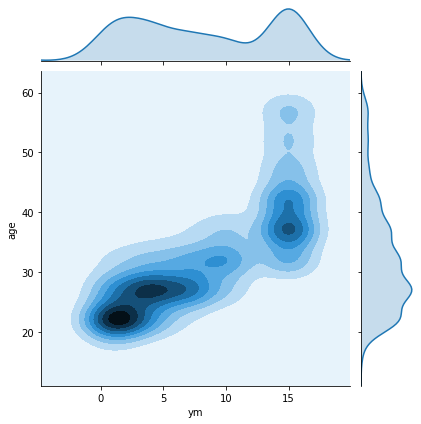

In [0]:
# Using Seaborn, compare number of years married vs number of affairs 
# using jointplot and kind as kde to compare the densitites

sns.jointplot(affairs['ym'], affairs['age'], kind='kde')

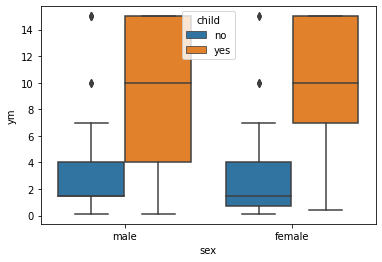

In [0]:
# Plot the Boxplot of sex v/s years married and apply hue of child
# Use Seaborn

sns.boxplot(x = "sex", y = "ym", hue = "child", data = affairs)

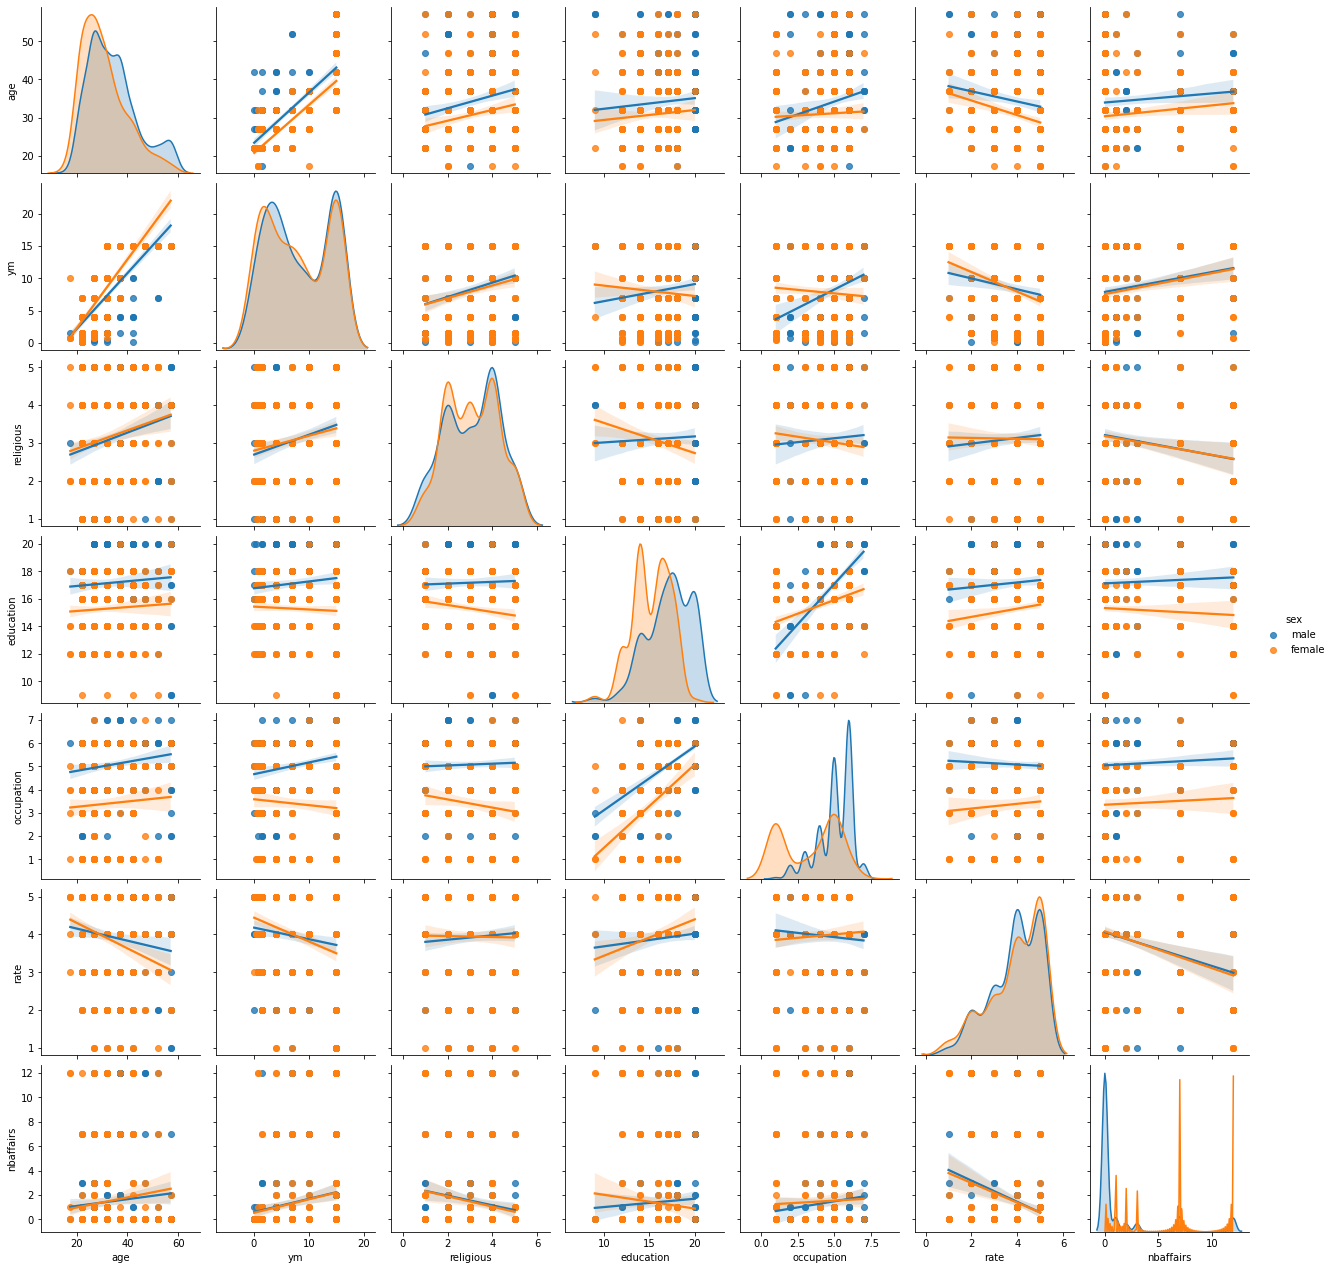

In [0]:
# Plot all attrbiutes v/s each other using Seaborn pairplot; 
# apply hue as the gender and kind as regression model
# Use Seaborn

sns.pairplot(affairs, hue = 'sex', kind = 'reg')

In [0]:
# Find the unique counts of religious attribute
# Hint: use value_counts method

affairs.religious.value_counts()

4    190
2    164
3    129
5     70
1     48
Name: religious, dtype: int64

In [0]:
# Convert religious attribute to 4 meaningful names

rel_meanings = ['not', 'mildly', 'fairly', 'strongly']
affairs['religious'] = affairs['religious'].apply(lambda x: rel_meanings[min(x, 4)-1])

In [0]:
affairs.religious.value_counts()

strongly    260
mildly      164
fairly      129
not          48
Name: religious, dtype: int64

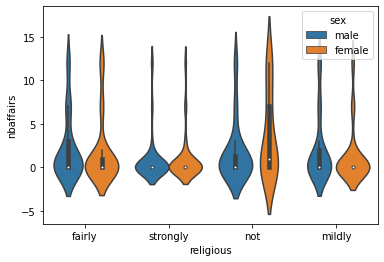

In [0]:
# Show the violin plot of number of affairs vs religious 
# and apply hue of gender
# Use Seaborn

sns.violinplot(x = "religious", y = "nbaffairs", hue = "sex", data = affairs)